In [1]:
%matplotlib inline
from MLJEC_MCTruth_Model import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

Using TensorFlow backend.
/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
model = loadModel('ak5_true_response_target')

/usr/local/lib/python2.7/site-packages/keras/engine/topology.py:1252: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


In [4]:
df = pd.read_pickle('new_ak5.pkl')
df['jes_truth'] = df.apply(lambda row: row['jet_pt']/row['gen_pt'] if row['jet_gen_dr']<0.25 else -1.,axis=1)
df = df.loc[(df['jes_truth']>0.)&(df['jes_truth']<2.)&(df['ak5pfcand_ijet']<2)]

In [5]:
scaler = StandardScaler()
df['jet_eta_scaled'] = df['jet_eta'] / 2.5
df['jet_pt_exp'] = map(np.log,df['jet_pt'])
df['jet_pt_scaled'] = scaler.fit_transform(df['jet_pt_exp'].reshape(-1, 1))
df.head()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


,event,run,lumi,ak5pfcand_ijet,ak5pfcand_eta,ak5pfcand_phi,ak5pfcand_pt,ak5pfcand_charge,ak5pfcand_id,met,...,jet_neutHad_mult,jet_photon_frac,jet_electron_frac,jet_muon_frac,jet_charHad_frac,jet_neutHad_frac,jes_truth,jet_eta_scaled,jet_pt_exp,jet_pt_scaled
0,1,1,1,0,"[0.21452178061, 0.216439172626, 0.231952786446...","[2.48508191109, 2.48497080803, 2.49175453186, ...","[169.566833496, 88.5687332153, 21.9073181152, ...","[0, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1...","[22, 211, 211, 211, 211, 211, 211, 211, 211, 2...",21.159410,...,3,0.407766,0.0,0.0,0.584626,0.009408,1.054301,0.076095,6.131769,1.961877
1,1,1,1,1,"[0.28475934267, 0.281884253025, 0.300727695227...","[-0.173191145062, -0.153716906905, -0.09728183...","[40.4561271667, 30.6164569855, 23.1051216125, ...","[0, 1, -1, -1, 0, 1, -1, 1, -1, -1, 1, 1, 1, 0...","[22, 211, 211, 211, 22, 211, 211, 211, 211, 21...",21.159410,...,6,0.305057,0.0,0.0,0.640896,0.060194,0.983834,0.108901,5.521115,1.185914
12,2,1,2,0,"[-0.283379286528, -0.519989550114, -0.21821196...","[-1.94438958168, -1.94570481777, -1.9536969661...","[158.4480896, 69.2879486084, 44.1545982361, 43...","[0, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 0, -...","[22, 211, 211, 211, 211, 211, 211, 211, 211, 2...",28.083078,...,3,0.313386,0.0,0.0,0.665130,0.028195,1.005174,-0.143982,6.500447,2.430360
13,2,1,2,1,"[1.5232257843, 1.53686988354, 1.51850914955, 1...","[1.16939890385, 1.12993788719, 1.13437724113, ...","[103.533737183, 93.8207550049, 45.6510047913, ...","[0, 0, -1, -1, -1, 1, 0, 1, 1, 0, -1, -1, -1, ...","[130, 22, 211, 211, 211, 211, 22, 211, 211, 13...",28.083078,...,4,0.300307,0.0,0.0,0.428797,0.274056,0.949488,0.605433,6.011894,1.809551
24,2828,1,12,0,"[-1.00876903534, -1.00456035137, -1.0215094089...","[-0.202069446445, -0.180981457233, -0.18487790...","[215.670425415, 69.4226837158, 37.9222221375, ...","[0, -1, 0, 1, -1, -1, 1, -1, 0, 0, 0, 0, 0, -1...","[130, 211, 22, 211, 211, 211, 211, 211, 22, 22...",0.000005,...,1,0.161526,0.0,0.0,0.376169,0.463720,0.968903,-0.405307,6.142226,1.975165


In [6]:
jet_image = np.array(map(lambda x : x[0] , df['jet_image']))

In [7]:
inputs = [jet_image.reshape([-1,30,30,1]),np.array(df['jet_pt_scaled']),np.array(df['jet_eta_scaled'])]

In [8]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy','mse','msle'])

In [9]:
df['prediction_CNN'] = model.predict(inputs)
df['residual_CNN'] = df['prediction_CNN'] - df['jes_truth']

In [10]:
df['rho_area'] = df['rho']*df['jet_area']

In [11]:
df = df.sample(frac=1)
df_train,df_test = np.array_split(df,2)
df_test.head()

,event,run,lumi,ak5pfcand_ijet,ak5pfcand_eta,ak5pfcand_phi,ak5pfcand_pt,ak5pfcand_charge,ak5pfcand_id,met,...,jet_muon_frac,jet_charHad_frac,jet_neutHad_frac,jes_truth,jet_eta_scaled,jet_pt_exp,jet_pt_scaled,prediction_CNN,residual_CNN,rho_area
507806,3770273,1,11391,0,"[-1.02653360367, -1.04571437836, -1.076125741,...","[-2.067309618, -2.03234791756, -2.01103019714,...","[17.0506477356, 13.2026567459, 7.36158704758, ...","[0, 1, 1, 0, -1, -1, 0, -1, 1, 0, 0, 0, 0, -1,...","[22, 211, 211, 130, 211, 211, 22, 211, 211, 22...",10.869217,...,0.0,0.472325,0.086362,1.080015,-0.415608,4.463494,-0.158014,0.971249,-0.108766,5.260493
627254,5057442,1,17746,1,"[0.309315413237, 0.285978764296, 0.30690759420...","[1.3381973505, 1.33972358704, 1.33154165745, 1...","[60.6400909424, 33.090965271, 28.6622848511, 2...","[-1, -1, 1, -1, 1, -1, 1, 1, 0, 1, 0, -1, 0, -...","[211, 211, 211, 211, 211, 211, 211, 211, 130, ...",20.060074,...,0.0,0.968461,0.012229,0.906150,0.122261,5.255624,0.848552,0.983298,0.077148,1.892995
463550,3540952,1,12557,1,"[0.893507957458, 0.893505334854, 0.85919636488...","[-0.470700800419, -0.448669970036, -0.49601182...","[17.0959854126, 9.56146430969, 7.27721405029, ...","[1, -1, -1, 0, 0, -1, 0, 1, -1, 0, -1, 0, 0, 0...","[211, 211, 211, 22, 22, 211, 130, 211, 211, 22...",6.859879,...,0.0,0.610648,0.071926,0.996951,0.364636,4.422802,-0.209722,1.011706,0.014755,5.688427
283534,1611155,1,3637,0,"[3.95748877525, 3.95929884911, 4.13312292099, ...","[-0.446840971708, -0.271954238415, -0.44886013...","[15.8852787018, 4.95420742035, 4.14841794968, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2]",7.234675,...,0.0,0.000000,0.000000,1.096679,1.592522,3.443340,-1.454334,1.090362,-0.006318,4.962530
68108,391967,1,980,0,"[0.904914975166, 0.765045940876, 0.74614721536...","[1.70267868042, 1.74817049503, 1.59340155125, ...","[13.0976400375, 9.9849319458, 4.11286687851, 3...","[-1, -1, 0, 1, 0, 1, 0, -1, -1, 1, 0, 1, 0, -1...","[211, 211, 22, 211, 22, 211, 22, 211, 211, 211...",12.072273,...,0.0,0.665971,0.023823,0.991879,0.314832,4.168613,-0.532723,0.994098,0.002218,8.291732


In [11]:
df.to_pickle('new_ak5_withCNN.pkl')

In [12]:
def residual_profile(indep_var,dep_var,c,low_bin,high_bin,nbins,ylow,yhigh):
    print "plot_var:",indep_var
    print "low_bin:",low_bin
    print "high_bin:",high_bin
    print "nbins:",nbins
    df_test[indep_var+'_bins'] = pd.cut(df_test[indep_var],np.arange(low_bin,high_bin+0.00001,(high_bin-low_bin)/float(nbins)),labels=range(nbins))
    means = df_test.groupby([indep_var+'_bins']).mean()[dep_var].values
    counts = df_test.groupby([indep_var+'_bins']).count()[dep_var].values
    sqrt_counts = map(np.sqrt,counts)
    errs  = df_test.groupby([indep_var+'_bins']).std()[dep_var].values
    errs = errs/sqrt_counts
    bin_center=np.arange(low_bin,high_bin+0.00001,(high_bin-low_bin)/float(nbins))
    bin_center = bin_center[:-1]
    bin_center = map(lambda x : x+(high_bin-low_bin)/float(nbins)/2.,bin_center)
    plt.errorbar(x=bin_center,y=means,yerr=errs,fmt='o',color=c)
    plt.xlabel(indep_var)
    plt.ylabel("<residual>")
    plt.ylim(ylow,yhigh)

plot_var: jet_pt
low_bin: 10
high_bin: 1000
nbins: 90


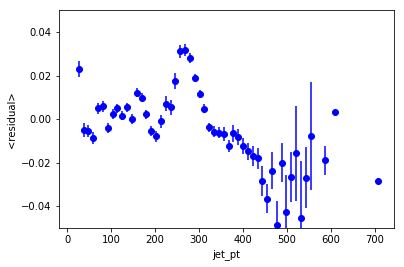

plot_var: jet_eta
low_bin: -5
high_bin: 5
nbins: 60


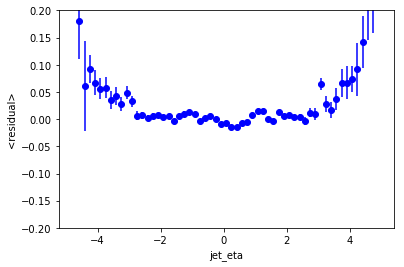

plot_var: rho
low_bin: 0
high_bin: 30
nbins: 60


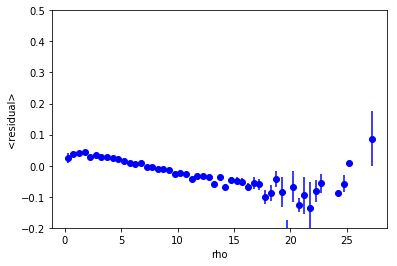

plot_var: jet_area
low_bin: 0.0
high_bin: 1.6
nbins: 60


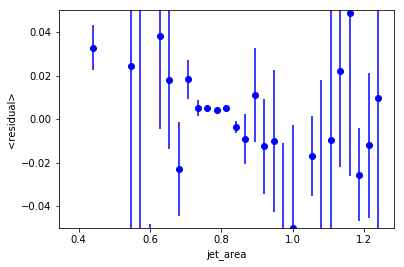

plot_var: rho_area
low_bin: 0
high_bin: 30
nbins: 60


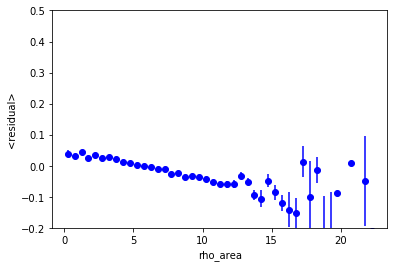

plot_var: jet_electron_frac
low_bin: 0
high_bin: 1.5
nbins: 50


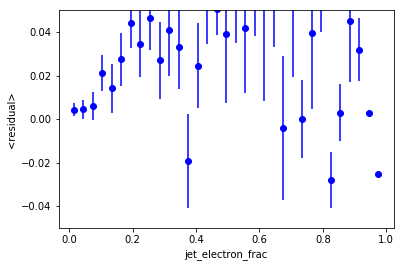

plot_var: jet_muon_frac
low_bin: 0
high_bin: 1.5
nbins: 50


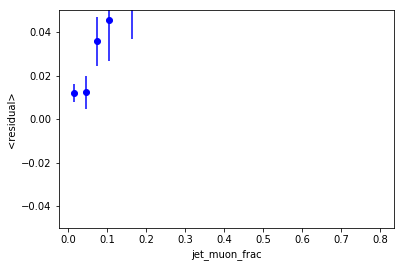

plot_var: jet_photon_frac
low_bin: 0
high_bin: 1.5
nbins: 50


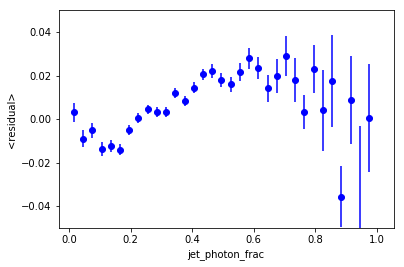

plot_var: jet_neutHad_frac
low_bin: 0
high_bin: 1.5
nbins: 50


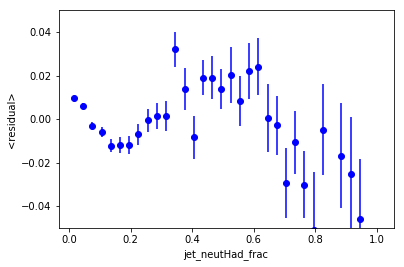

plot_var: jet_charHad_frac
low_bin: 0
high_bin: 1.5
nbins: 50


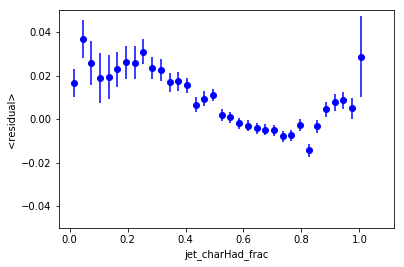

plot_var: jet_electron_mult
low_bin: 0
high_bin: 100
nbins: 100


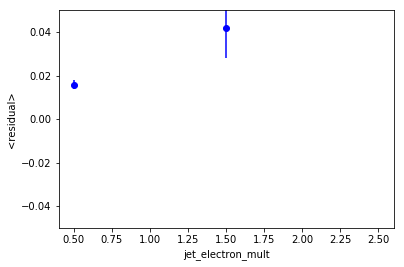

plot_var: jet_muon_mult
low_bin: 0
high_bin: 100
nbins: 100


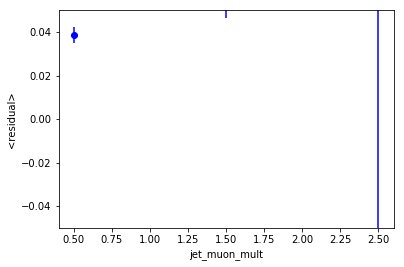

plot_var: jet_photon_mult
low_bin: 0
high_bin: 100
nbins: 100


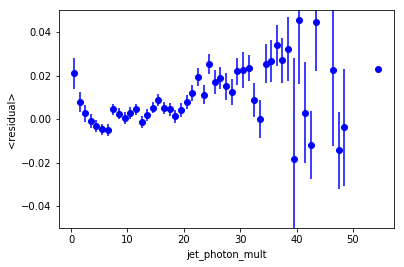

plot_var: jet_neutHad_mult
low_bin: 0
high_bin: 100
nbins: 100


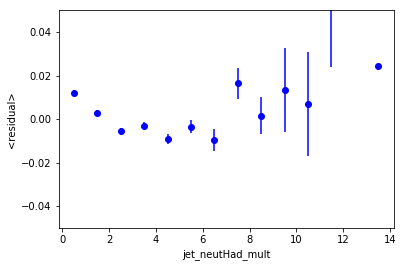

plot_var: jet_charHad_mult
low_bin: 0
high_bin: 100
nbins: 100


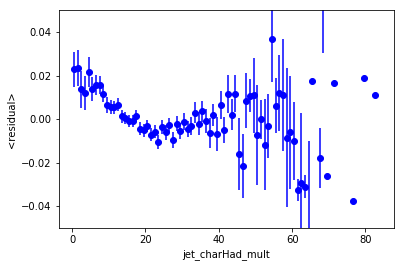

In [13]:
plot_vars=['jet_pt','jet_eta','rho','jet_area','rho_area','jet_electron_frac','jet_muon_frac','jet_photon_frac','jet_neutHad_frac','jet_charHad_frac','jet_electron_mult','jet_muon_mult','jet_photon_mult','jet_neutHad_mult','jet_charHad_mult']
var_binning = [(10,1000,90,-0.05,0.05),(-5,5,60,-0.2,0.2),(0,30,60,-0.2,0.5),(0.,1.6,60,-0.05,0.05),(0,30,60,-0.2,0.5),(0,1.5,50,-0.05,0.05),(0,1.5,50,-0.05,0.05),(0,1.5,50,-0.05,0.05),(0,1.5,50,-0.05,0.05),(0,1.5,50,-0.05,0.05),(0,100,100,-0.05,0.05),(0,100,100,-0.05,0.05),(0,100,100,-0.05,0.05),(0,100,100,-0.05,0.05),(0,100,100,-0.05,0.05)]
for v,b in zip(plot_vars,var_binning) :
    residual_profile(v,'residual_CNN','b',*b)
    plt.show()

plot_var: jet_pt
low_bin: 10
high_bin: 1000
nbins: 90
plot_var: jet_pt
low_bin: 10
high_bin: 1000
nbins: 90


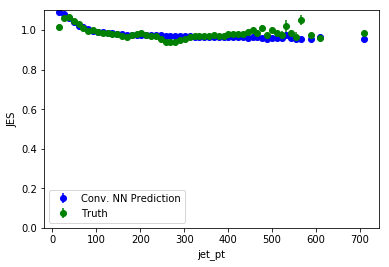

plot_var: jet_eta
low_bin: -5
high_bin: 5
nbins: 60
plot_var: jet_eta
low_bin: -5
high_bin: 5
nbins: 60


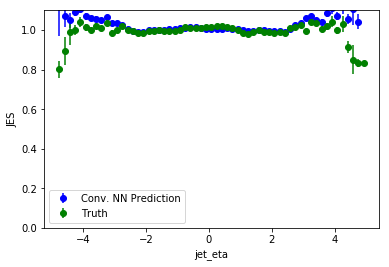

plot_var: rho
low_bin: 0
high_bin: 30
nbins: 60
plot_var: rho
low_bin: 0
high_bin: 30
nbins: 60


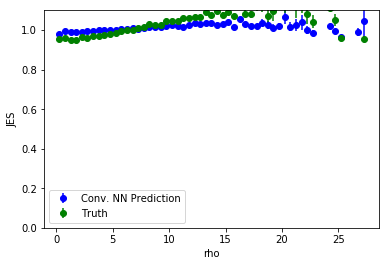

plot_var: jet_area
low_bin: 0.0
high_bin: 1.6
nbins: 60
plot_var: jet_area
low_bin: 0.0
high_bin: 1.6
nbins: 60


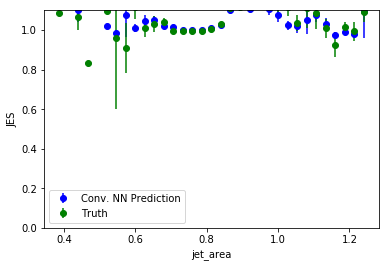

plot_var: rho_area
low_bin: 0
high_bin: 30
nbins: 60
plot_var: rho_area
low_bin: 0
high_bin: 30
nbins: 60


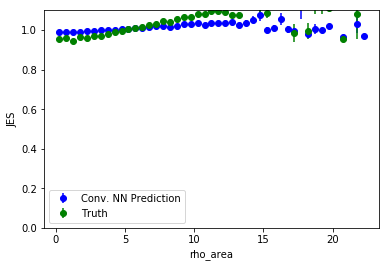

plot_var: jet_electron_frac
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_electron_frac
low_bin: 0
high_bin: 1.5
nbins: 50


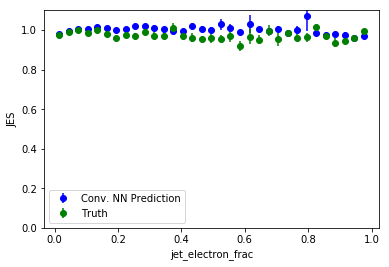

plot_var: jet_muon_frac
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_muon_frac
low_bin: 0
high_bin: 1.5
nbins: 50


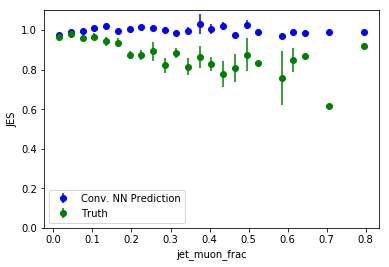

plot_var: jet_photon_frac
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_photon_frac
low_bin: 0
high_bin: 1.5
nbins: 50


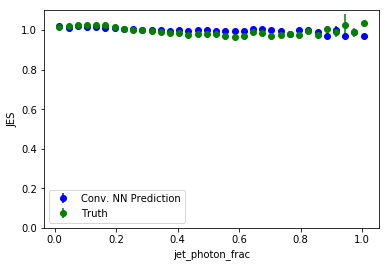

plot_var: jet_neutHad_frac
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_neutHad_frac
low_bin: 0
high_bin: 1.5
nbins: 50


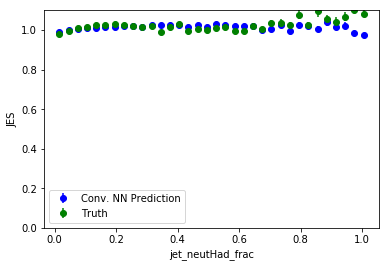

plot_var: jet_charHad_frac
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_charHad_frac
low_bin: 0
high_bin: 1.5
nbins: 50


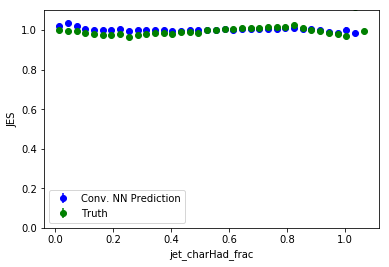

plot_var: jet_electron_mult
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_electron_mult
low_bin: 0
high_bin: 100
nbins: 100


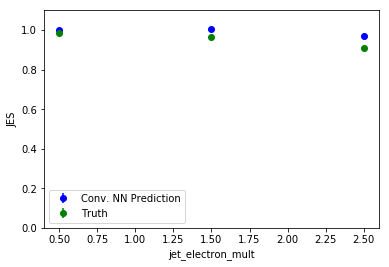

plot_var: jet_muon_mult
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_muon_mult
low_bin: 0
high_bin: 100
nbins: 100


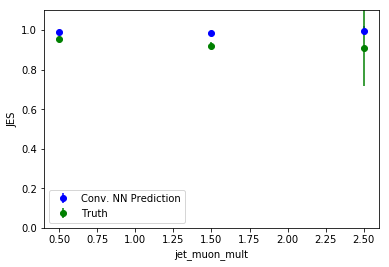

plot_var: jet_photon_mult
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_photon_mult
low_bin: 0
high_bin: 100
nbins: 100


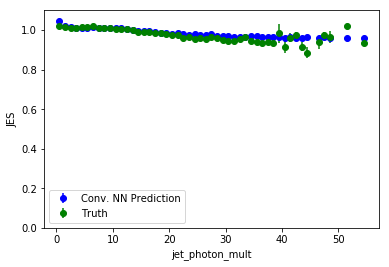

plot_var: jet_neutHad_mult
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_neutHad_mult
low_bin: 0
high_bin: 100
nbins: 100


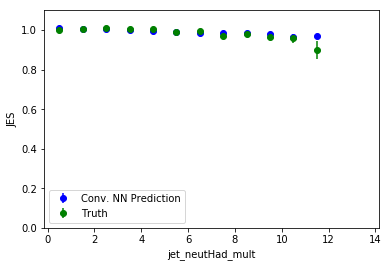

plot_var: jet_charHad_mult
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_charHad_mult
low_bin: 0
high_bin: 100
nbins: 100


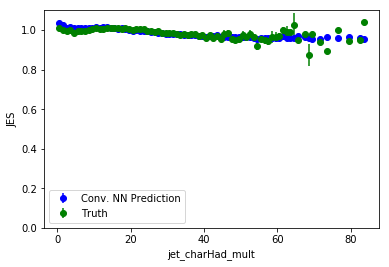

In [14]:
for v,b in zip(plot_vars,var_binning) :
    residual_profile(v,'prediction_CNN','b',b[0],b[1],b[2],0,1.1)
    residual_profile(v,'jes_truth','g',b[0],b[1],b[2],0,1.1)
    plt.legend(['Conv. NN Prediction','Truth'])
    plt.ylabel('JES')
    plt.show()

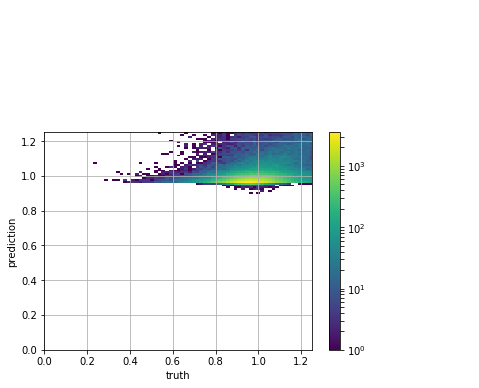

In [15]:
plt.hist2d(df['jes_truth'],df['prediction_CNN'],bins=100,norm=LogNorm())
plt.xlabel('truth')
plt.ylabel('prediction')
plt.xlim(0,1.25)
plt.ylim(0,1.25)
plt.grid()
plt.colorbar()
plt.show()